In [1]:
%matplotlib inline

import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print("hello")

hello


In [2]:
num_inputs = 2
num_examples= 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))

print(features[0], labels[0])

tensor([-0.5846,  0.4405], dtype=torch.float64) tensor(1.5325, dtype=torch.float64)


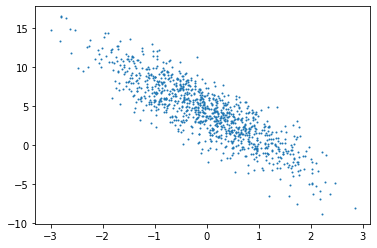

In [3]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

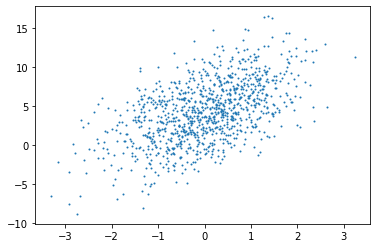

In [4]:
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)


In [5]:
from d2lzh.function import *

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[ 0.2046, -0.0353],
        [-0.6757,  0.9563],
        [-0.8209, -0.0577],
        [ 0.3972, -0.0573],
        [ 0.3645, -0.8607],
        [ 0.6302,  0.1020],
        [ 0.1235, -0.0666],
        [-2.2850,  0.3819],
        [-0.4741, -0.7764],
        [ 0.5088,  1.1620]], dtype=torch.float64) tensor([ 4.7300, -0.3783,  2.7438,  5.1848,  7.8531,  5.1214,  4.6728, -1.6566,
         5.9110,  1.2401], dtype=torch.float64)


In [6]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float64)
b = torch.zeros(1, dtype=torch.float64)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)
print(w, b)

tensor([[-0.0193],
        [-0.0015]], dtype=torch.float64, requires_grad=True) tensor([0.], dtype=torch.float64, requires_grad=True)


In [7]:
from d2lzh.function import *

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in  range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.034527
epoch 2, loss 0.000120
epoch 3, loss 0.000051


In [8]:
print(true_w, '\n', w)
print(true_b, '\n', b)


[2, -3.4] 
 tensor([[ 1.9998],
        [-3.3999]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1992], dtype=torch.float64, requires_grad=True)
